In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from google.colab import files
import seaborn as sns

In [2]:
from google.colab import files

# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving datos_usuarios.csv to datos_usuarios.csv


In [3]:
data = pd.read_csv('datos_usuarios.csv')

In [4]:
data

,Nombre del Cliente,País de Destino,Email,Ocupación Actual,Sueldo Actual,Sueldo Deseado,Sector Deseado,Años de Experiencia Laboral,Idiomas,Edad,En qué País Reside Actualmente,Sexo
0,Ezequiel Salgado Vargas,Reino Unido,veronica32@example.com,Ayudante contable,1330.21,6225.49,Manufactura,4,Español (Nativo),24,Colombia,Femenino
1,Josefa Larrea-Taboada,Australia,javiera95@example.net,Abogado,1555.36,4691.69,Tecnología,10,Inglés (Intermedio),48,Colombia,Masculino
2,Julie Figueras-Fernández,Reino Unido,dolores84@example.net,Administrativo,1635.54,6036.74,Educación,15,"Francés (Básico), Español (Nativo), Alemán (Bá...",25,Colombia,Masculino
3,Adora Palomino-Barón,Australia,jordanasancho@example.net,Mecanico,3098.10,5823.84,Finanzas,19,"Inglés (Intermedio), Francés (Básico), Alemán ...",34,Colombia,Femenino
4,Ulises Julio César Gutierrez Vendrell,Australia,nicanor35@example.org,Cocinero,1395.09,4890.30,Educación,4,"Francés (Básico), Alemán (Básico), Español (Na...",43,Colombia,Masculino
5,Iván Roma Bustos,Australia,renatavillalonga@example.com,Mecanico,4747.40,5569.51,Finanzas,14,"Alemán (Básico), Español (Nativo)",50,Colombia,Femenino
6,Violeta Cervera Carmona,Reino Unido,anna97@example.net,Electricista,4038.34,6991.49,Educación,2,Español (Nativo),28,Colombia,Masculino
7,Reinaldo del Barberá,Reino Unido,torrentsdolores@example.com,Enfermero,3923.02,7794.19,Salud,14,"Inglés (Intermedio), Alemán (Básico), Francés ...",55,Colombia,Masculino
8,Delia Guillen Cadenas,Australia,qvigil@example.org,Cocinero,4304.40,4157.31,Tecnología,17,"Alemán (Básico), Francés (Básico), Inglés (Int...",50,Colombia,Masculino
9,Juan Amores Vilalta,Reino Unido,ruthazorin@example.org,Abogado,2063.26,5868.62,Ventas,19,"Inglés (Intermedio), Español (Nativo)",32,Colombia,Masculino


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nombre del Cliente              37 non-null     object 
 1   País de Destino                 37 non-null     object 
 2   Email                           37 non-null     object 
 3   Ocupación Actual                37 non-null     object 
 4   Sueldo Actual                   37 non-null     float64
 5   Sueldo Deseado                  37 non-null     float64
 6   Sector Deseado                  37 non-null     object 
 7   Años de Experiencia Laboral     37 non-null     int64  
 8   Idiomas                         37 non-null     object 
 9   Edad                            37 non-null     int64  
 10  En qué País Reside Actualmente  37 non-null     object 
 11  Sexo                            37 non-null     object 
dtypes: float64(2), int64(2), object(8)
mem

<Axes: title={'center': 'Ocupaciones de nuestros usuarios'}, ylabel='Ocupación Actual'>

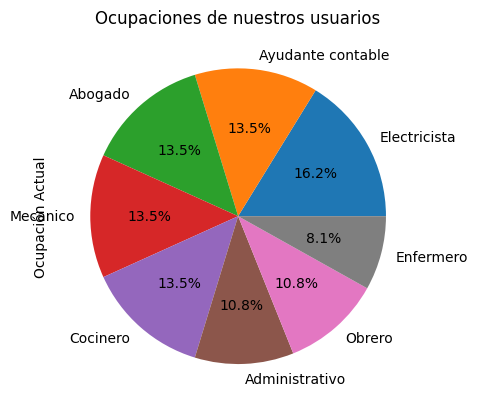

In [8]:
data['Ocupación Actual'].value_counts().plot(kind='pie',autopct='%.1f%%', title='Ocupaciones de nuestros usuarios')

<Axes: title={'center': 'Idiomas que manejan los usuarios'}>

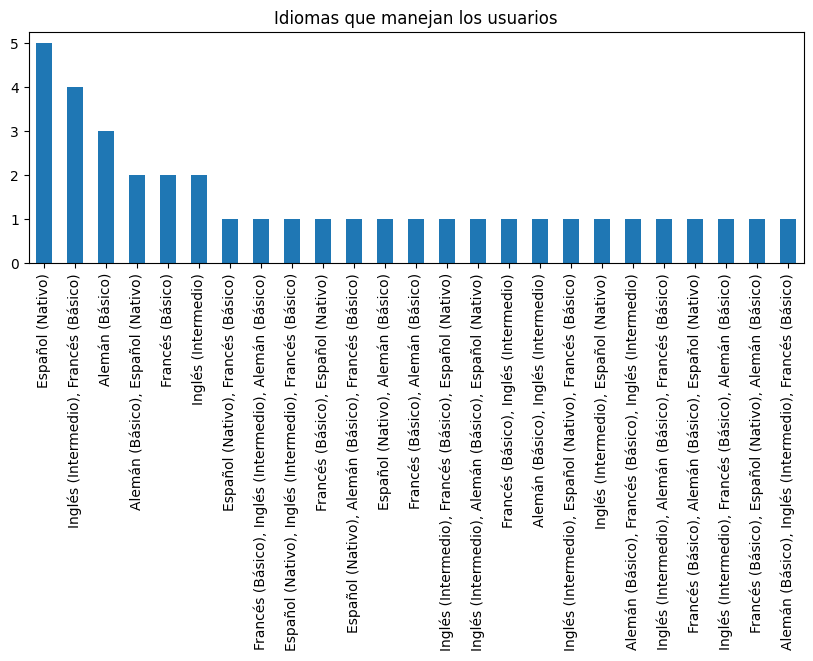

In [7]:
data['Idiomas'].value_counts().plot(kind='bar', title='Idiomas que manejan los usuarios',figsize=(10,3))

In [9]:
SectorD_Pais_destino=data.groupby(['Sector Deseado','País de Destino']).size()

In [10]:
SectorD_Pais_destino = SectorD_Pais_destino.reset_index()

In [12]:
SectorD_Pais_destino =pd.pivot_table(SectorD_Pais_destino,columns='Sector Deseado', index='País de Destino',values=0)
SectorD_Pais_destino

Sector Deseado,Educación,Finanzas,Manufactura,Salud,Tecnología,Ventas
País de Destino,,,,,,
Alemania,3.0,1.0,1.0,NaN,NaN,2.0
Australia,1.0,4.0,4.0,NaN,5.0,2.0
Canadá,1.0,NaN,NaN,1.0,2.0,1.0
Reino Unido,3.0,1.0,1.0,2.0,NaN,2.0


<Axes: title={'center': 'Sectores deseados por paises'}, xlabel='País de Destino'>

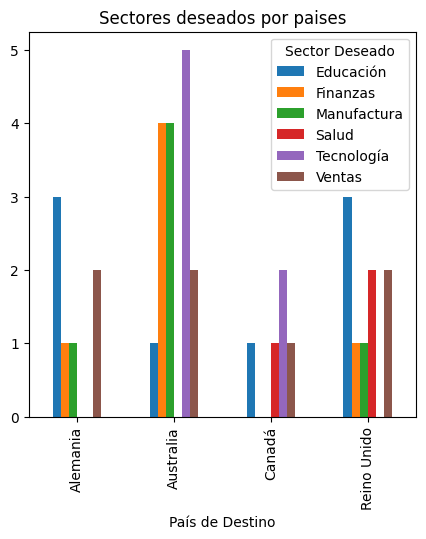

In [14]:
SectorD_Pais_destino.plot(kind='bar', title= 'Sectores deseados por paises',figsize=(5,5)) 

(array([5., 4., 5., 0., 1., 3., 1., 8., 5., 5.]),
 array([1030.4  , 1416.901, 1803.402, 2189.903, 2576.404, 2962.905,
        3349.406, 3735.907, 4122.408, 4508.909, 4895.41 ]),
 <BarContainer object of 10 artists>)

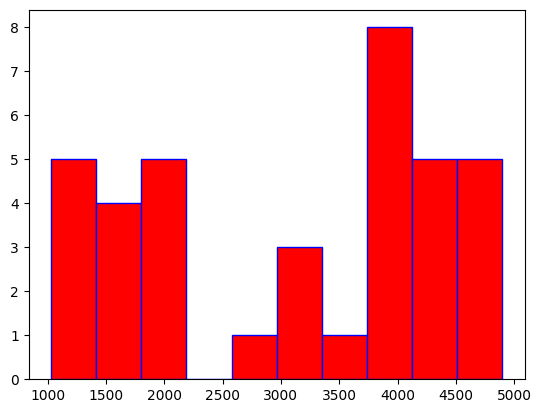

In [15]:
plt.hist(data['Sueldo Actual'],10, color= 'Red', ec='Blue')

(array([4., 1., 3., 7., 3., 4., 3., 3., 6., 3.]),
 array([3069.88 , 3542.311, 4014.742, 4487.173, 4959.604, 5432.035,
        5904.466, 6376.897, 6849.328, 7321.759, 7794.19 ]),
 <BarContainer object of 10 artists>)

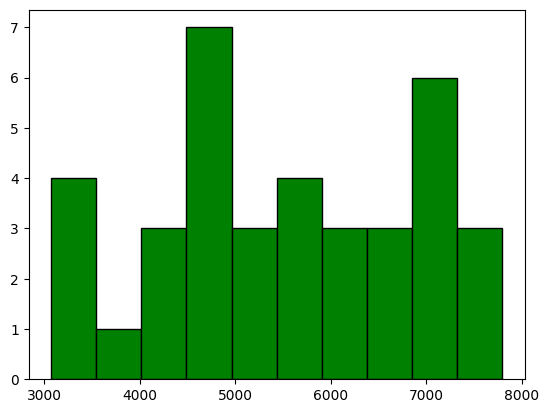

In [17]:
plt.hist(data['Sueldo Deseado'],10, color= 'Green', ec='black')